## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on March 15th, 2024, 11:59 pm, through email with Github link.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
print(dataTraining.shape)

(7895, 5)


In [5]:
print(dataTraining.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7895 entries, 3107 to 215
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    7895 non-null   int64  
 1   title   7895 non-null   object 
 2   plot    7895 non-null   object 
 3   genres  7895 non-null   object 
 4   rating  7895 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 370.1+ KB
None


In [6]:
print(dataTraining.describe())

              year       rating
count  7895.000000  7895.000000
mean   1989.726409     6.402812
std      22.660717     1.078260
min    1894.000000     1.200000
25%    1980.000000     5.800000
50%    1997.000000     6.500000
75%    2007.000000     7.200000
max    2015.000000     9.300000


**Análisis de frecuencia por géneros**

In [7]:
# Crear una lista de todos los géneros
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

todos_generos = [genero for sublist in dataTraining['genres'] for genero in sublist]
frecuencia_generos = pd.Series(todos_generos).value_counts()

# Mostrar la frecuencia de géneros
print(frecuencia_generos)

Drama          3965
Comedy         3046
Thriller       2024
Romance        1892
Crime          1447
Action         1303
Adventure      1024
Horror          954
Mystery         759
Sci-Fi          723
Fantasy         707
Family          682
Documentary     419
Biography       373
War             348
Music           341
History         273
Musical         271
Sport           261
Animation       260
Western         237
Film-Noir       168
Short            92
News              7
Name: count, dtype: int64


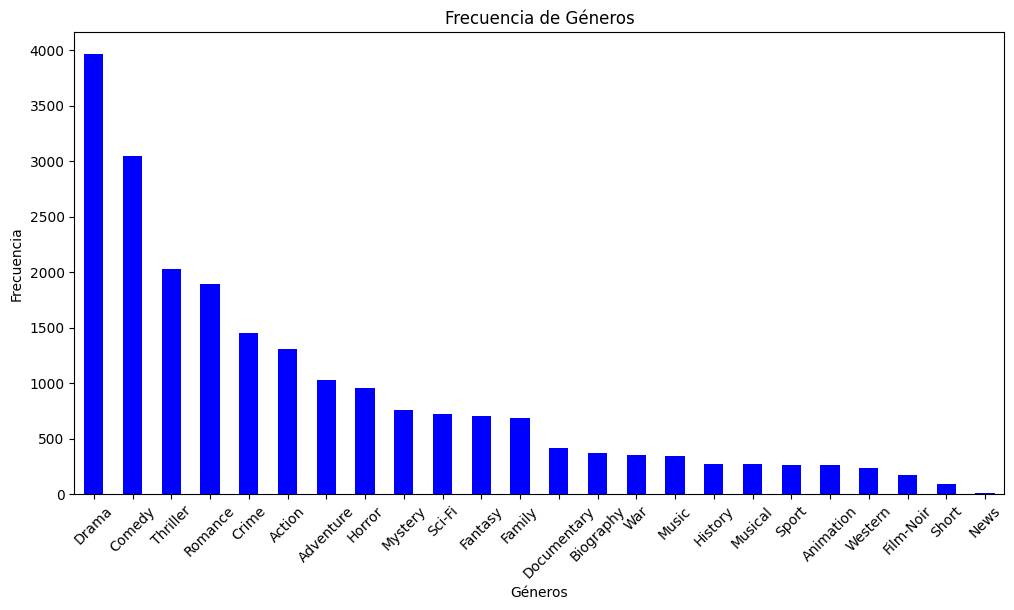

In [8]:
plt.figure(figsize=(12, 6))
frecuencia_generos.plot(kind='bar', color='blue')
plt.title('Frecuencia de Géneros')
plt.xlabel('Géneros')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


**Análisis de frecuencia por rating**

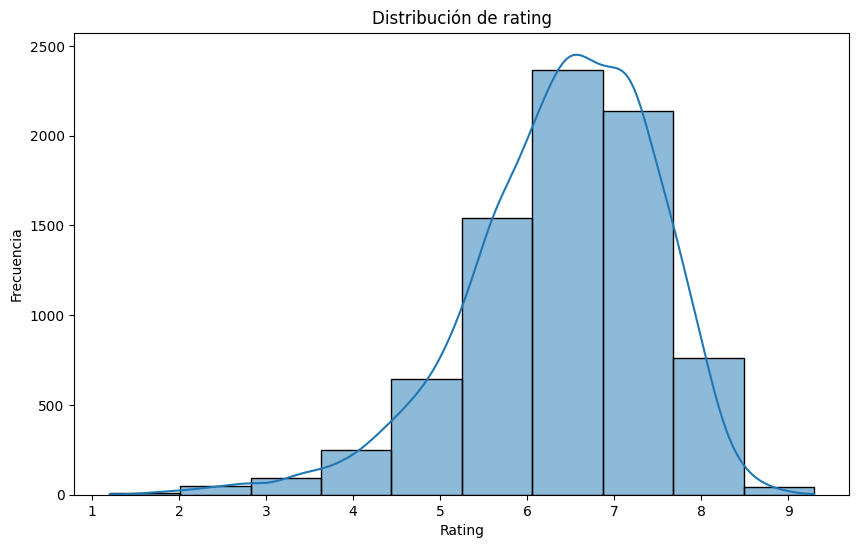

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(dataTraining['rating'], bins=10, kde=True)
plt.title('Distribución de rating')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


**Análisis de frecuencia de películas por año de lanzamiento**

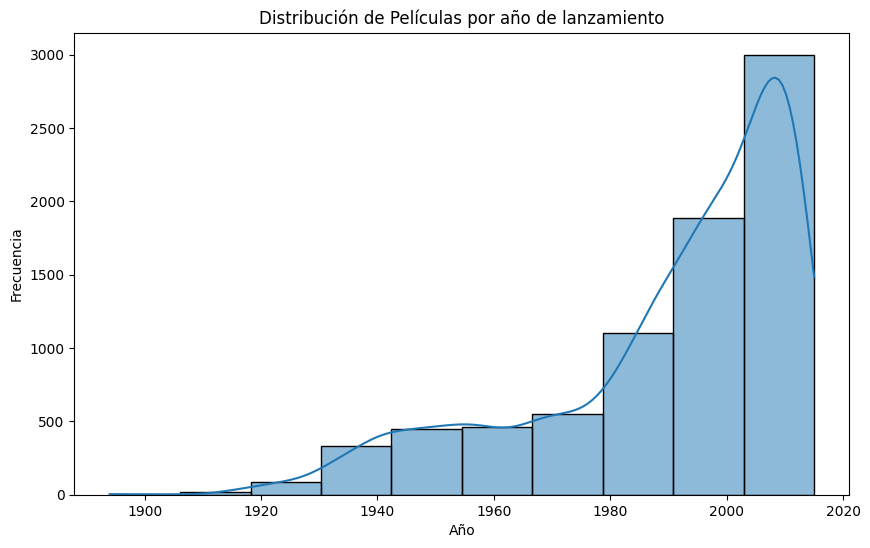

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(dataTraining['year'], bins=10, kde=True)
plt.title('Distribución de Películas por año de lanzamiento')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


In [11]:
year_counts = dataTraining['year'].value_counts().sort_index()
year_counts_df = pd.DataFrame(year_counts).reset_index()
year_counts_df.columns = ['Year', 'Number of Movies']

print(year_counts_df)


     Year  Number of Movies
0    1894                 2
1    1896                 1
2    1903                 1
3    1910                 1
4    1914                 1
..    ...               ...
101  2011               266
102  2012               277
103  2013               288
104  2014               242
105  2015                49

[106 rows x 2 columns]
